In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.layers import LSTM,BatchNormalization
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import io

In [5]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
TheftData=pd.read_csv("D:\ElectricityTheft\Dataset\TunedElectricityDataset.csv")

In [7]:
#Converting the Categorical features
TheftData.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,10.120000,9.960000,16.920000,7.600000,27.220000,18.050000,26.470000,18.75000,17.840000,14.92000
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.32268,11.015589,10.69165
3,B32AC8CC6D5D805AC053557AB05F5343,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,6.500000,9.990000,11.780000,18.590000,26.800000,18.570000,14.590000,12.82000,19.370000,15.92000
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.900000,3.420000,3.810000,4.5800,3.56000,4.250000,3.860000,3.530000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.14000,18.410000,17.31000


In [8]:
X = TheftData.iloc[:, 2:1036].astype('float32' )
y = TheftData.iloc[:, 1]

In [9]:
X

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,10.120000,9.960000,16.920000,7.600000,27.219999,18.049999,26.469999,18.750000,17.840000,14.920000
1,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,9.304656,10.758718,9.942215,11.173497,11.482926,11.656425,11.322680,11.015589,10.691649
3,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,6.500000,9.990000,11.780000,18.590000,26.799999,18.570000,14.590000,12.820000,19.370001,15.920000
4,2.900000,3.420000,3.8100,4.580000,3.56000,4.250000,3.860000,3.530000,3.410000,0.850000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.139999,18.410000,17.309999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,4.250000,3.560000,3.380000,4.390000,3.720000,3.770000,3.960000,3.640000,3.400000,4.380000
42368,2.700000,4.390000,3.9500,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.810000,4.870000,4.480000,3.670000,3.310000,4.580000,3.330000,3.190000,4.570000,4.000000
42369,0.580000,0.840000,1.6100,0.900000,0.60000,0.820000,0.890000,0.030000,0.730000,1.680000,...,8.836129,0.660000,2.920000,2.360000,3.860000,4.280000,3.370000,6.670000,2.440000,1.150000
42370,16.889999,13.840000,13.5000,14.600000,14.46000,12.340000,15.370000,17.010000,13.460000,19.559999,...,21.129999,13.750000,22.610001,18.830000,25.520000,18.110001,19.309999,17.480000,17.200001,15.280000


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


from sklearn.preprocessing import OneHotEncoder
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(integer_encoded)
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
# Encoding categorical data


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [13]:
X_train

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
39220,8.580000,9.160000,14.0300,9.950000,13.64000,12.130000,11.890000,11.530000,8.650000,7.150000,...,5.93,8.21,5.950000,9.040000,6.65,6.640000,6.690000,4.74,4.850000,5.80
33734,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.43,11.64,6.980000,5.170000,11.04,12.190000,13.210000,15.87,16.610001,15.59
12702,3.380000,4.340000,4.7000,4.740000,4.95000,5.210000,6.170000,3.310000,3.020000,1.430000,...,6.01,8.36,4.050000,8.680000,4.94,2.730000,4.460000,4.15,3.530000,3.58
38907,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00
14711,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.97,5.84,3.280000,8.260000,4.99,4.500000,3.360000,4.03,4.670000,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,7.650000,8.230000,6.9800,4.730000,4.62000,6.780000,5.300000,6.660000,6.500000,1.380000,...,0.02,0.00,0.000000,0.010000,0.00,0.000000,0.030000,0.00,0.010000,0.00
28017,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,9.39,8.77,9.900000,8.790000,8.76,7.770000,9.640000,9.84,8.750000,8.80
29199,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,15.65,15.50,18.110001,17.389999,21.18,16.700001,20.190001,20.73,15.610000,13.79
40061,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00


In [14]:
X_train.shape

(31779, 1034)

In [15]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [16]:
y_train.shape

(31779, 2)

In [17]:
X_test.shape

(10593, 1034)

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Input(shape=(1034,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Adding dropout for regularization
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(2, activation='softmax'))  # Adjust activation based on your task (e.g., 'softmax' for multi-class classification)

# Compile the model


# Print model summary

In [19]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, y_train,validation_split=0.25, batch_size = 256, epochs = 5)

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
94/94 [==============================] - 4s 15ms/step - loss: 0.3243 - accuracy: 0.9038 - val_loss: 0.2825 - val_accuracy: 0.9150
Epoch 2/5
94/94 [==============================] - 1s 10ms/step - loss: 0.2925 - accuracy: 0.9155 - val_loss: 0.2751 - val_accuracy: 0.9153
Epoch 3/5
94/94 [==============================] - 1s 10ms/step - loss: 0.2902 - accuracy: 0.9150 - val_loss: 0.2737 - val_accuracy: 0.9148
Epoch 4/5
94/94 [==============================] - 1s 10ms/step - loss: 0.2870 - accuracy: 0.9150 - val_loss: 0.2736 - val_accuracy: 0.9149
Epoch 5/5
94/94 [==============================] - 1s 10ms/step - loss: 0.2857 - accuracy: 0.9148 - val_loss: 0.2736 - val_accuracy: 0.9149


In [20]:
history.history['accuracy']

[0.9037929177284241,
 0.9155408143997192,
 0.9149953722953796,
 0.9149534106254578,
 0.914785623550415]

In [21]:
history.history['val_accuracy']

[0.915040910243988,
 0.9152926206588745,
 0.9147891998291016,
 0.9149150252342224,
 0.9149150252342224]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


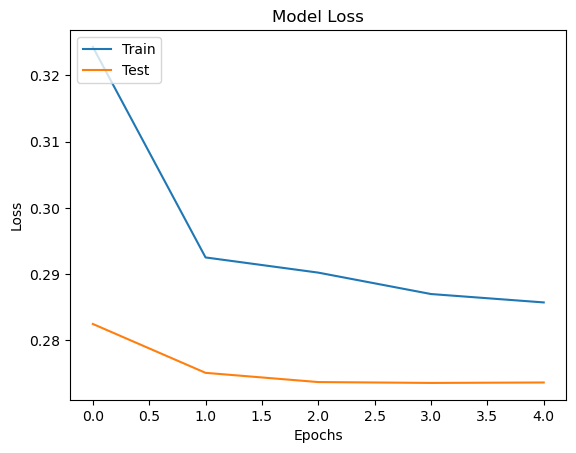

In [22]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

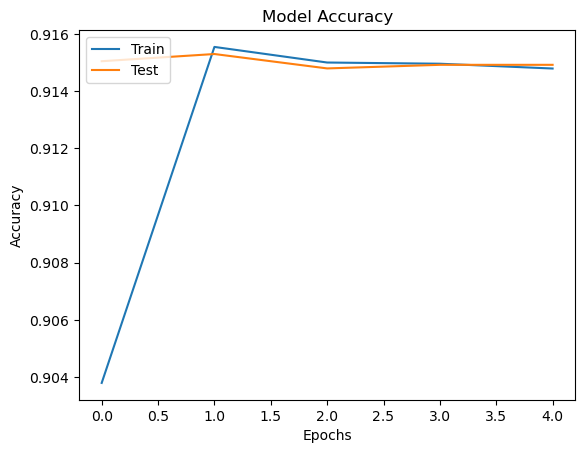

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

In [24]:
y_pred = model.predict(X_test)

332/332 [==============================] - 1s 2ms/step


In [25]:
for y in y_pred:
    print(y)
    print("==============")

[0.9951919  0.00480805]
[0.9984828  0.00151711]
[0.99734265 0.00265731]
[0.9987767  0.00122336]
[0.9971484  0.00285161]
[0.9888293  0.01117063]
[0.99531823 0.00468168]
[0.98922026 0.01077966]
[0.998918   0.00108192]
[0.98611075 0.01388914]
[0.9969538  0.00304628]
[0.9983255  0.00167448]
[0.9846686  0.01533133]
[9.993097e-01 6.902131e-04]
[0.9975582  0.00244178]
[9.9936205e-01 6.3790515e-04]
[0.9972657  0.00273437]
[0.99506116 0.0049389 ]
[0.99233806 0.00766194]
[0.98571795 0.01428197]
[0.9927576  0.00724226]
[0.9902012  0.00979882]
[9.9903613e-01 9.6383010e-04]
[0.9888028  0.01119709]
[0.99282026 0.00717962]
[9.9928784e-01 7.1224483e-04]
[0.9984074  0.00159257]
[9.9912941e-01 8.7060133e-04]
[0.9886147  0.01138531]
[9.9939764e-01 6.0239201e-04]
[0.99502736 0.00497259]
[0.99528575 0.00471421]
[0.9856242  0.01437583]
[0.99888027 0.00111979]
[0.9958428  0.00415713]
[0.992762   0.00723798]
[0.9988024  0.00119762]
[0.9957937  0.00420629]
[0.9924707  0.00752939]
[0.99819034 0.0018097 ]
[0.998

[0.9971042  0.00289565]
[0.9965005  0.00349955]
[0.99754274 0.00245718]
[0.997573   0.00242696]
[0.99487966 0.00512036]
[0.7295378 0.2704623]
[0.99382716 0.00617281]
[0.9979546  0.00204539]
[0.9940968  0.00590315]
[0.9976674  0.00233258]
[0.9984938  0.00150604]
[0.9928079  0.00719199]
[0.998637   0.00136297]
[0.9855132  0.01448677]
[0.99575    0.00425003]
[0.9978068  0.00219313]
[0.99707454 0.0029254 ]
[0.993061   0.00693899]
[0.99102753 0.00897242]
[0.99731827 0.00268164]
[0.9974757  0.00252426]
[0.9988867  0.00111333]
[0.9976556  0.00234434]
[0.9887599  0.01124015]
[9.993759e-01 6.241050e-04]
[0.99659467 0.00340528]
[9.9924946e-01 7.5053313e-04]
[9.9902362e-01 9.7627915e-04]
[0.99511427 0.00488568]
[0.9937878 0.0062121]
[0.9912521  0.00874776]
[0.9975522 0.0024477]
[0.9799082  0.02009173]
[0.9939569  0.00604304]
[9.9946702e-01 5.3309475e-04]
[0.7259168 0.2740831]
[0.9964761  0.00352374]
[0.99642104 0.003579  ]
[0.98257864 0.01742141]
[0.99176776 0.00823214]
[0.9947038  0.00529622]
[0

[9.9933106e-01 6.6885428e-04]
[0.9959819  0.00401819]
[0.9960051  0.00399472]
[0.99623007 0.00376986]
[0.9941299  0.00587003]
[9.993488e-01 6.511947e-04]
[0.99132717 0.00867274]
[0.9960282  0.00397187]
[0.9979262  0.00207375]
[0.9890409  0.01095906]
[0.99550635 0.00449361]
[0.99888456 0.0011155 ]
[0.9961656  0.00383433]
[0.99396104 0.00603893]
[0.9927385  0.00726143]
[0.997727 0.002273]
[0.9971524  0.00284752]
[0.9983432  0.00165679]
[0.9979442  0.00205583]
[0.9956268  0.00437315]
[9.9935836e-01 6.4162276e-04]
[0.9984981  0.00150187]
[0.9890894  0.01091054]
[0.99007136 0.00992863]
[0.99354273 0.00645737]
[0.9984386  0.00156143]
[0.9945985  0.00540144]
[0.9939223  0.00607765]
[9.9912536e-01 8.7457639e-04]
[0.99877274 0.00122732]
[0.9984441 0.001556 ]
[0.9989979  0.00100203]
[0.9921941  0.00780596]
[9.9925387e-01 7.4613711e-04]
[9.993703e-01 6.297905e-04]
[0.9974084  0.00259158]
[0.99631375 0.00368628]
[0.98847836 0.01152166]
[0.998848   0.00115201]
[0.9974383  0.00256162]
[0.99259263 0.

[0.9956479  0.00435202]
[0.99696404 0.00303595]
[0.9890834  0.01091665]
[0.98642147 0.01357854]
[0.9978591  0.00214097]
[0.9957862  0.00421371]
[9.9934214e-01 6.5787783e-04]
[0.9910957  0.00890424]
[0.9975959  0.00240401]
[0.9945749  0.00542512]
[0.9969153  0.00308475]
[0.99675643 0.00324356]
[0.99657303 0.00342683]
[0.99639386 0.00360615]
[0.9978988  0.00210122]
[0.9946418  0.00535822]
[0.9845834  0.01541665]
[0.9980886  0.00191127]
[9.993673e-01 6.327584e-04]
[0.9771416  0.02285837]
[0.99622315 0.00377682]
[0.9928719  0.00712808]
[0.99239403 0.00760605]
[0.98940045 0.01059941]
[0.9989934  0.00100663]
[0.99438477 0.00561526]
[0.9838079  0.01619207]
[0.9936063 0.0063936]
[0.9907665 0.0092335]
[0.99342823 0.00657181]
[0.99565667 0.00434328]
[0.9974268  0.00257319]
[0.9982221  0.00177791]
[9.992981e-01 7.019396e-04]
[0.99863607 0.00136395]
[0.99559104 0.00440888]
[0.99823654 0.00176346]
[0.99340206 0.00659798]
[0.99523795 0.00476204]
[0.9983291  0.00167089]
[0.9973263  0.00267374]
[0.996

[0.99589425 0.00410573]
[0.9989003  0.00109973]
[0.9986462  0.00135387]
[9.9929810e-01 7.0205645e-04]
[0.9959626  0.00403735]
[0.9980535  0.00194641]
[0.9974337  0.00256634]
[0.99756926 0.00243077]
[0.9989574  0.00104255]
[0.9923544  0.00764562]
[0.9976613  0.00233863]
[0.99696416 0.00303581]
[0.98652214 0.0134779 ]
[0.9952884  0.00471164]
[0.99316496 0.00683496]
[0.98651165 0.01348834]
[0.9970161  0.00298383]
[0.9961539  0.00384615]
[9.9912333e-01 8.7658531e-04]
[0.9904361  0.00956379]
[0.9946636  0.00533636]
[9.9932295e-01 6.7703973e-04]
[0.99889815 0.00110188]
[0.99509805 0.00490199]
[0.99772555 0.00227444]
[0.92754936 0.0724507 ]
[0.99630535 0.00369471]
[9.9947435e-01 5.2555947e-04]
[0.9964001  0.00359984]
[0.9953782  0.00462187]
[0.9908781  0.00912188]
[0.9900252  0.00997478]
[0.99062574 0.00937428]
[0.99681205 0.00318798]
[0.9944199 0.0055802]
[0.99831957 0.00168041]
[0.98718005 0.01281998]
[0.99886787 0.00113215]
[0.9890839  0.01091621]
[0.991796   0.00820398]
[0.8620463  0.1379

[0.99886906 0.00113089]
[0.99493694 0.0050631 ]
[0.9965341  0.00346585]
[0.9981777  0.00182219]
[0.9983629  0.00163707]
[0.99422485 0.00577521]
[0.9866391  0.01336085]
[0.9895969  0.01040308]
[0.99620676 0.00379321]
[0.99793035 0.00206954]
[0.99692976 0.00307016]
[0.99756926 0.00243077]
[0.9967915  0.00320855]
[0.99365 0.00635]
[0.9920777 0.0079223]
[0.99867225 0.00132773]
[0.9986795  0.00132047]
[0.99747735 0.00252266]
[0.9956778  0.00432214]
[0.98916674 0.01083325]
[0.9943369  0.00566304]
[0.9943531  0.00564699]
[0.9912374  0.00876263]
[0.988581   0.01141895]
[0.9982097  0.00179026]
[0.99763703 0.00236296]
[0.98520213 0.0147979 ]
[0.9975996 0.0024004]
[9.9934000e-01 6.6003314e-04]
[0.9970303  0.00296972]
[0.98780525 0.01219479]
[0.98897517 0.01102482]
[0.9984668  0.00153319]
[0.73181206 0.2681879 ]
[9.993858e-01 6.142243e-04]
[0.9984995  0.00150043]
[0.9961822  0.00381777]
[0.99756926 0.00243077]
[9.9917513e-01 8.2488370e-04]
[0.99791765 0.00208231]
[0.99692875 0.00307127]
[0.9969981

In [26]:
predicted = []
for y in y_pred:
    max_index = y.tolist().index(max(y))
    predicted.append(max_index)

In [27]:
actual = []
for y in y_test:
    max_index = y.tolist().index(max(y))
    actual.append(max_index)

In [30]:
y

array([1., 0.])

In [29]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predicted)

array([[9663,   14],
       [ 903,   13]], dtype=int64)

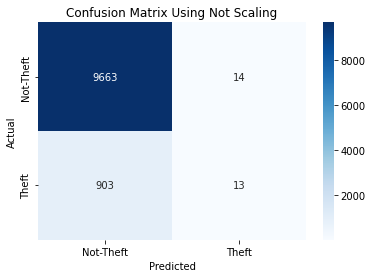

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
TP = 9663
FP = 14
TN = 13
FN = 903

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not-Theft', 'Theft'], yticklabels=['Not-Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Not Scaling')
plt.show()


In [32]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9677
           1       0.48      0.01      0.03       916

    accuracy                           0.91     10593
   macro avg       0.70      0.51      0.49     10593
weighted avg       0.88      0.91      0.87     10593



In [33]:
cm=classification_report(actual,predicted)

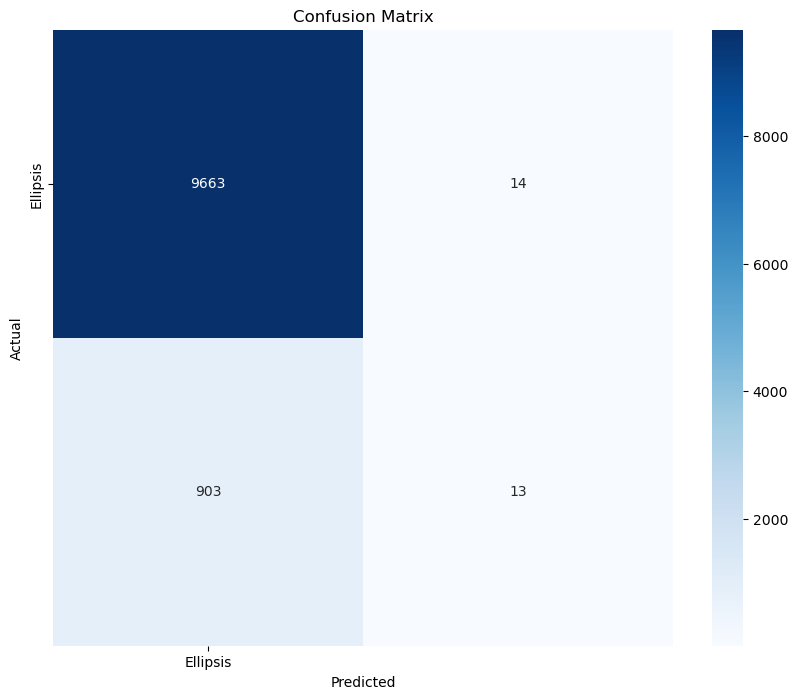

In [34]:
import seaborn as sns
cm = confusion_matrix(actual, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[...], yticklabels=[...])  # Replace [...] with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

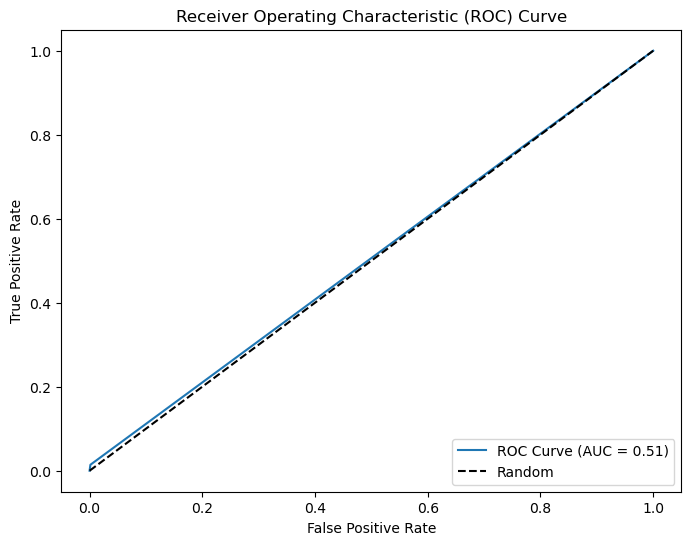

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
df = pd.DataFrame(X_test).head(10)
#df = pd.DataFrame(X_testNormal)
df.to_csv("D:\ElectricityTheft\\NotNormal\\NotNormalXtest.csv")


In [37]:
df = pd.DataFrame(X_train).head(10)

df.to_csv("D:\ElectricityTheft\\NotNormal\\NotNormalXtrain.csv")

In [38]:
val1=[]
val2=[]
for y in y_pred:
    print(y[0])
    print(y[1])
    print("====")
    val1.append(y[0])
    val2.append(y[1])

0.9951919
0.0048080473
====
0.9984828
0.0015171054
====
0.99734265
0.0026573099
====
0.9987767
0.0012233644
====
0.9971484
0.0028516054
====
0.9888293
0.011170633
====
0.99531823
0.00468168
====
0.98922026
0.010779664
====
0.998918
0.0010819181
====
0.98611075
0.0138891395
====
0.9969538
0.0030462781
====
0.9983255
0.0016744838
====
0.9846686
0.015331334
====
0.9993097
0.0006902131
====
0.9975582
0.0024417846
====
0.99936205
0.00063790515
====
0.9972657
0.0027343729
====
0.99506116
0.004938902
====
0.99233806
0.0076619363
====
0.98571795
0.014281973
====
0.9927576
0.00724226
====
0.9902012
0.009798817
====
0.99903613
0.0009638301
====
0.9888028
0.011197088
====
0.99282026
0.00717962
====
0.99928784
0.00071224483
====
0.9984074
0.0015925705
====
0.9991294
0.00087060133
====
0.9886147
0.01138531
====
0.99939764
0.000602392
====
0.99502736
0.004972587
====
0.99528575
0.00471421
====
0.9856242
0.014375829
====
0.99888027
0.0011197868
====
0.9958428
0.004157134
====
0.992762
0.007237984
===

In [39]:
df = pd.DataFrame({'Actual': actual, 'Softmax Predicted Value 1': val1, 'Softmax Predicted Value 2': val2, 'Predicted Result': predicted})
df.to_csv("D:\ElectricityTheft\\NotNormal\\ActualPredicted.csv")

In [40]:
df = pd.DataFrame({'Training Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy']})
df.to_csv("D:\ElectricityTheft\\NotNormal\\NotNormalAccuracies.csv")

In [41]:
actual

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
